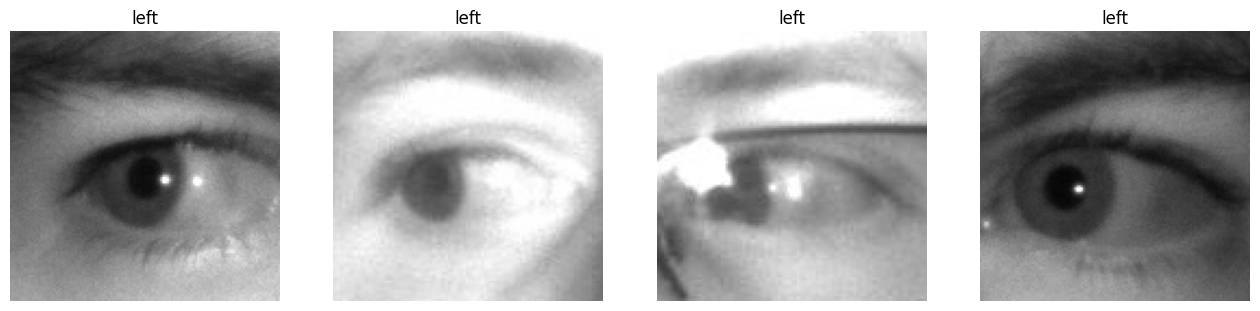

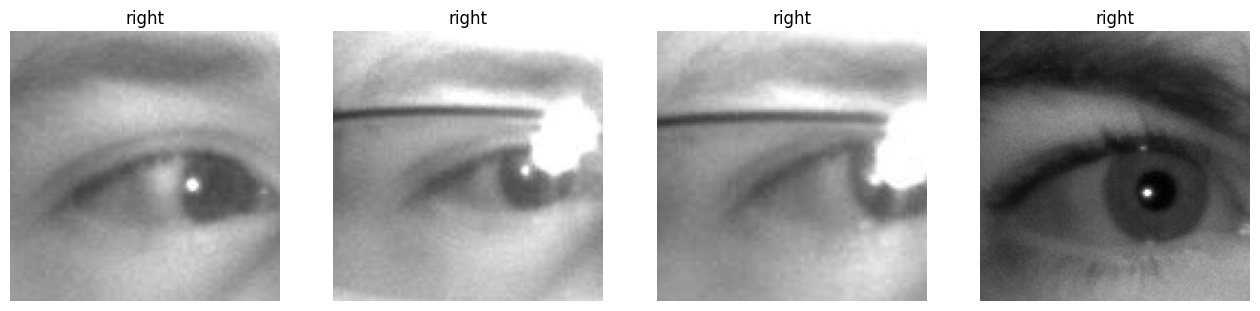

In [1]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Paths to the dataset
TRAIN_PATH = "dataset/eye-direction/train"
TEST_PATH = "dataset/eye-direction/test"

# Function to view random images from both classes
def view_random_images(path, class_name):
    plt.figure(figsize=(16, 16))

    for i in range(4):
        plt.subplot(1, 4, i + 1)

        # Corrected the path by adding a forward slash between path and class_name
        random_img = random.choice(os.listdir(path + '/' + class_name))
        img = cv2.imread(path + '/' + class_name + '/' + random_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.show()

# Display random images from both classes
view_random_images(TRAIN_PATH, "left")
view_random_images(TRAIN_PATH, "right")

In [2]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [3]:
DIMS = (128,128)
IMG_SIZE = 128
BATCH_SIZE = 32
SEED = 42

In [4]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dataset = ImageFolder(root=TRAIN_PATH, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = ImageFolder(root=TEST_PATH, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
